**The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.   
Predicted attribute: class of iris plant. **

In [1]:
# importing iris dataset from sklearn.datasets
from sklearn.datasets import load_iris

In [2]:
# creating an object of load iris
iris=load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
X=iris.data
y=iris.target

In [7]:
# KNN classification is a method where it will take the sample and compare with all the observation and take best 5 and 
# take best population out of those
# k=1; means it will take the nearest species 
# k=5; take best of 5 nearest species
from sklearn.neighbors import KNeighborsClassifier

In [8]:
knn=KNeighborsClassifier(n_neighbors=1)

In [9]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [10]:
# fit the model with the data and model will learn the relationship between X and y
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [11]:
# and once the model is trained we can use it to predict new observations and get the response.
# lets pass list which has observation
import numpy as np
knn.predict(np.array([3,5,4,2]).reshape(1,4))

array([2])

In [12]:
# lets try for multiple observations
arry=np.array([[3,5,4,2],[5,4,3,2]])
arry.size

8

In [13]:
arry.ndim

2

In [14]:
knn.predict(arry)

array([2, 1])

In [15]:
# lets try for different values of k
# by default k value will be 5

In [16]:
knn=KNeighborsClassifier(n_neighbors=5)

In [17]:
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [18]:
knn.predict(arry)

array([1, 1])

In [19]:
# please observe now response is different when k=1

In [20]:
# lets use different classification model
from sklearn.linear_model import LogisticRegression

In [21]:
# creating LoR instance
loreg=LogisticRegression()

In [22]:
# fitting a model
loreg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
loreg.predict(arry)

array([2, 0])

In [25]:
# train the model with a dataset and test with the same
y_log=loreg.predict(X)

In [ ]:
# to find the accuracy new responses-actual responses

In [26]:
# here loreg predicted 2, 0, and we are not sure which one is correct.
# we can get the accuracy of the model using metrics module
from sklearn import metrics
metrics.accuracy_score(y_log,y)

0.96

In [27]:
# logistic regression accuracy 96%

In [28]:
# find the accuracy of knn model for 1 and 5
knn1=KNeighborsClassifier(n_neighbors=1)

In [29]:
knn1.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [30]:
y_knn1=knn1.predict(X)

In [31]:
metrics.accuracy_score(y_knn1,y)

1.0

In [32]:
# y_knn1 has 100% accuracy

In [33]:
knn5=KNeighborsClassifier(n_neighbors=5)

In [34]:
knn5.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [35]:
y_knn5=knn5.predict(X)

In [36]:
metrics.accuracy_score(y_knn5,y)

0.9666666666666667

In [37]:
# y_knn5 has 96.7% accuracy

###### It is not useful procedure to train and test the model on same dataset.   
Very low value of k will create high complexity model. High complexity model will overly fit.  
so what we can do is we can devide the dataset  into train and test.   
so that we can train the model using training dataset and test it using test dataset.  

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.4,random_state=4)
# test_size= by what percentage test dataset will have number of observation
# here 0.4 means X_test will have 40% of the observation

In [51]:
X_test.shape

(60, 4)

In [40]:
len(X_train)

90

In [41]:
# lets test the accuracy for all the models.
# logistic regression
logreg=LogisticRegression()  # creating instance

In [42]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
y_lg=logreg.predict(X_test)

In [44]:
# so lets compare y_lg with testing y_test so that we can get to know the accuracy
metrics.accuracy_score(y_lg,y_test)

0.95

#####  so logistic regression has 95% accuracy in predicting the response.

##### Lets calculate the accuracy for knn1

In [45]:
knn1.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [46]:
y_knn1_test=knn1.predict(X_test)

In [47]:
metrics.accuracy_score(y_knn1_test,y_test)

0.95

######  so knn1 model also have 95% accuracy in predicting the responses.

###### Lets calculate the accuracy for knn5 model

In [48]:
knn5.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [49]:
y_knn5_test=knn5.predict(X_test)

In [50]:
metrics.accuracy_score(y_knn5_test,y_test)

0.9666666666666667

###### so knn5 model has more accuracy in predicting the responses

###### what if we increase the k value will it give more accuracy. lets create a for loop for k value.

In [52]:
k_value=range(1,26)
knn_accuracy=[]
for k in k_value:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_predict=knn.predict(X_test)
    knn_accuracy.append(metrics.accuracy_score(y_predict,y_test))    

Text(0,0.5,'accuracy')

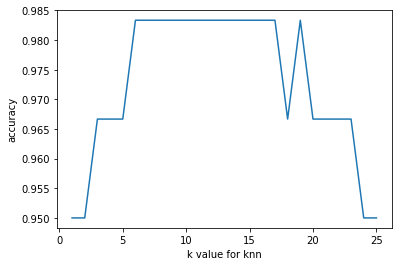

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_value,knn_accuracy)
plt.xlabel('k value for knn')
plt.ylabel('accuracy')

from the above figure we got to know accuracy is more for the k value between 11 to 18. 